In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *
from functools import partial

In [2]:
df_fig4_NatChem_MH = pd.read_csv(r'Data_sets\3a_fig4_osc_NatChem_MH.csv')
cut_off, CMC_3a = 5.25, 1.56
tau = 1.15
C_A2tol = df_fig4_NatChem_MH.loc[0, 'cA2'] + df_fig4_NatChem_MH.loc[0, 'cA'] / 2

df_fig4_NatChem_MH[['cA2', 'cA']] /= C_A2tol
df_fig4_NatChem_MH['cS'] /= CMC_3a

for s in ['TA2', 'TS', 'TA']:
    df_fig4_NatChem_MH[s] /= tau

<Axes: xlabel='TA2'>

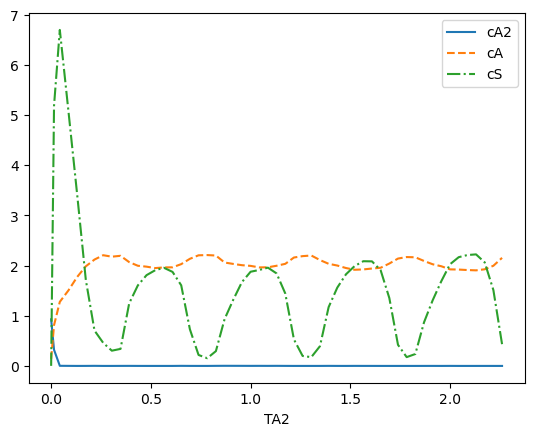

In [3]:
df_fig4_NatChem_MH.plot(x='TA2', y=['cA2', 'cA', 'cS'], style=['-', '--', '-.'])

In [3]:
params = np.array([115.0, 6.0, 0.9, 24.4])
consts = np.array([0.11, 2])
delay = np.array([0.01, 0.03])
init_cond = [0.9, 0]
delayed_model_fig4 = delayed_oscillation(delayed_full_first_order, delay=delay, params=params, consts=consts, init_cond=init_cond)
delayed_model_fig4.add_exp_data(df_fig4_NatChem_MH)
delayed_model_fig4.set_init_cond([0.93, 0, 0])

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.92917839 0.00132773 0.14164321]
Initial condition is set as [0.93, 0, 0]


In [4]:
delayed_model_fig4.set_delay([0.01, 0.03])
delayed_model_fig4.interactive_plot(exp=True, ran=40, ylim=3)

interactive(children=(FloatSlider(value=115.0, description='alpha', max=155.0, min=75.0, step=0.05), FloatSlid…

c:\Users\chem-sedm6967\AppData\Local\anaconda3\envs\jitcdde_clean_env\lib\site-packages\jitcdde\_jitcdde.py:324: UserWarning: The spline already contains points. This will remove them. Be sure that you really want this.
  self.past.constant(state,time)


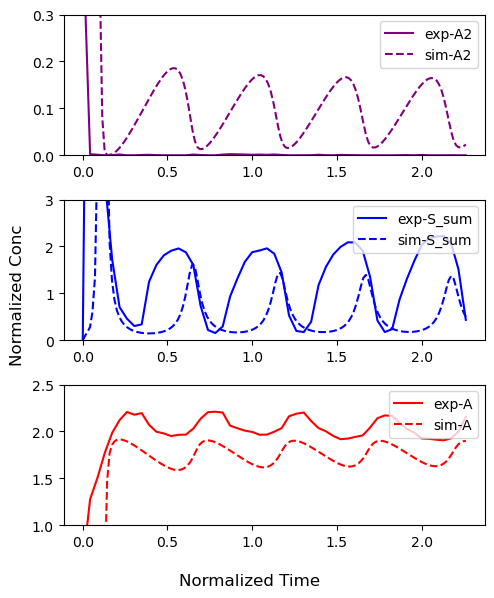

In [8]:
fig, axes = delayed_model_fig4.plot(exp=True, ylim=3, nvars=3)
axes[0].set_ylim([0, 0.3])
axes[2].set_ylim([1, 2.5])
fig.savefig(r'figs\NatChem_MH_fig4.png', dpi=300, bbox_inches='tight')

c:\Users\chem-sedm6967\AppData\Local\anaconda3\envs\jitcdde_clean_env\lib\site-packages\jitcdde\_jitcdde.py:324: UserWarning: The spline already contains points. This will remove them. Be sure that you really want this.
  self.past.constant(state,time)


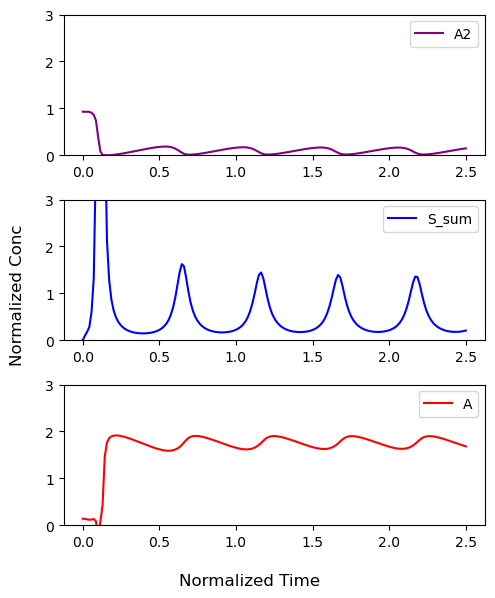

In [6]:
fig, axes = delayed_model_fig4.plot(ylim=3, nvars=3, t=2.5)

In [7]:
df_figS3_NatChem_MH = pd.read_csv(r'Data_sets\3a_figS3_osc_NatChem_MH.csv')
cut_off, CMC_3a = 5.25, 1.56
tau = 1.15
C_A2tol = df_figS3_NatChem_MH.loc[0, 'cA2'] + df_figS3_NatChem_MH.loc[0, 'cA'] / 2

df_figS3_NatChem_MH[['cA2', 'cA']] /= C_A2tol
df_figS3_NatChem_MH['cS'] /= CMC_3a

for s in ['TA2', 'TS', 'TA']:
    df_figS3_NatChem_MH[s] /= tau

In [28]:
df_figS3_NatChem_MH.head()

,TA2,cA2,TS,cS,TA,cA
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.144928,0.000023,0.144928,0.000488,0.144928,0.023852
2,0.231884,0.000120,0.231884,0.033433,0.231884,2.585386
3,0.304348,0.000116,0.304348,0.052487,0.304348,2.580250
4,0.362319,0.000122,0.362319,0.280077,0.362319,2.531648


In [29]:
params = np.array([60.5, 8.7, 1.25, 26.5])
consts = np.array([0.11, 2])
delay = np.array([0.01, 0.02])
init_cond = [0.9, 0]
delayed_model_figS3 = delayed_oscillation(delayed_full_first_order, delay=delay, params=params, consts=consts, init_cond=init_cond)
delayed_model_figS3.add_exp_data(df_figS3_NatChem_MH)
delayed_model_figS3.set_init_cond([0.9, 0, 0])

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [1. 0. 0.]
Initial condition is set as [0.9, 0, 0]


In [31]:
delayed_model_figS3.set_delay([0.01, 0.035])
delayed_model_figS3.interactive_plot(exp=True, ran=60, ylim=3)

interactive(children=(FloatSlider(value=60.5, description='alpha', max=120.5, min=0.5, step=0.05), FloatSlider…

(<Figure size 500x600 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

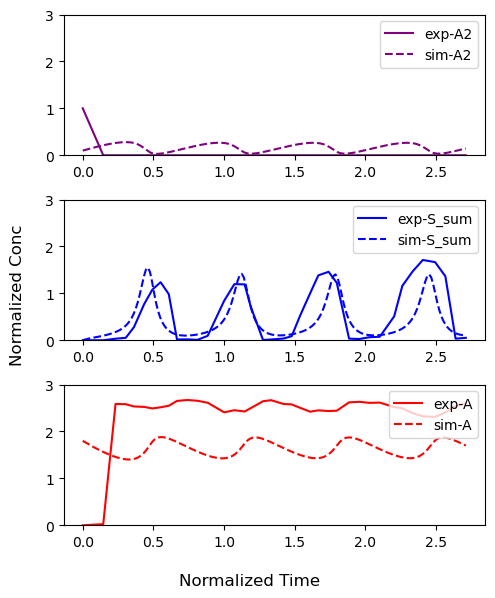

In [27]:
delayed_model_figS3.plot(exp=True, nvars=3, ylim=3)

# Full model with H2O2 consumption term

In [11]:
df_fig1f_NatChem_MH = pd.read_csv(r'Data_sets\3b_fig1f_osc_NatChem_MH.csv')

In [12]:
df_fig1f_NatChem_MH.head()

,TimeA2,cA2,TimeS,cS,TimeA,cA
0,0.00000,0.03815,0.00000,0.000000,0.00000,6.23893
1,0.03333,0.06646,0.03333,0.000186,0.03333,6.23185
2,0.06667,0.12019,0.06667,0.064120,0.06667,6.08913
3,0.10000,0.07858,0.10000,0.230420,0.10000,6.09074
4,0.13333,0.05347,0.13333,0.316740,0.13333,5.74169


In [14]:
params = np.array([8.5, 0.7, 0.5, 6.2, 20.0])
consts = np.array([0.17, 2])
delay = np.array([0.25, 0.62])
init_cond = np.array([0.05, 0, 0])
delayed_model = delayed_oscillation(delayed_full_first_order, delay, params, consts, init_cond)
delayed_model.set_species(['cA2', 'cS', 'cA', 'cO'])
delayed_model.add_exp_data(df_fig1f_NatChem_MH)
delayed_model.set_init_cond([0.04, 0, 0])

The species are ['cA2', 'cS', 'cA', 'cO']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.03815 0.      6.23893]
Initial condition is set as [0.04, 0, 0]


Generating, compiling, and loading C code.
Using default integration parameters.


(0.0, 3.0)

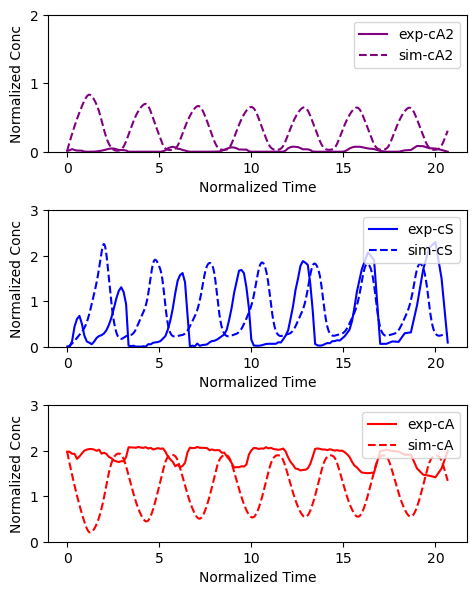

In [ ]:
fig, axes = delayed_model.plot(t=6, exp=True, nvars=3)
axes[0].set_ylim(0, 2)
axes[0].set_yticks([0, 1, 2])
axes[1].set_ylim(0, 3)
axes[2].set_ylim(0, 3)